**import Required libraries :**


In [37]:
import cv2
import urllib.request
import matplotlib.pyplot as plt

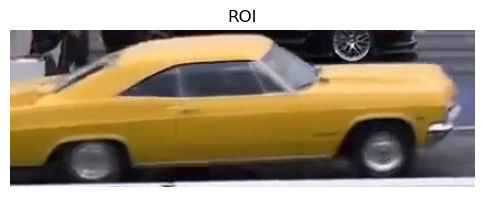

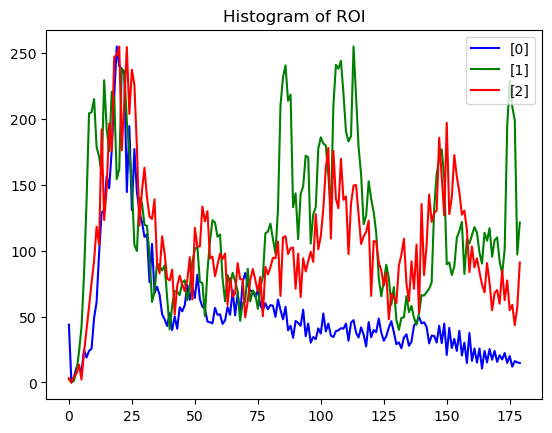

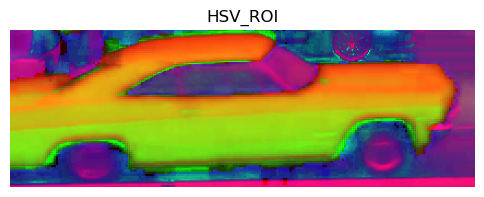

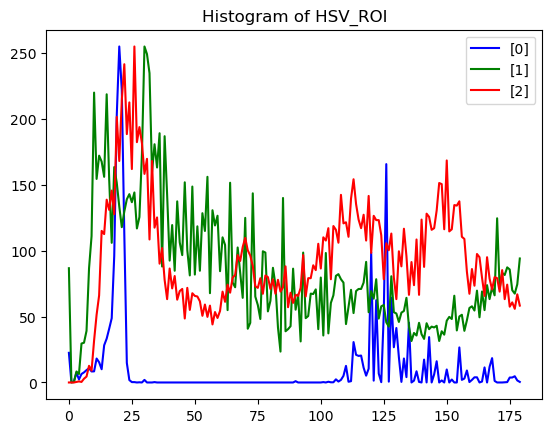

In [99]:
# URL to the raw video file on GitHub
video_url = "https://github.com/ZahraEk/OpenCV-Course/raw/main/videos/car_racing.mp4"

# Download the video
video_filename = "car_racing.mp4"
urllib.request.urlretrieve(video_url, video_filename)

cap = cv2.VideoCapture(video_filename)

# Capture 20 frames to allow the camera's autoexposure to adjust.
for i in range(20):
    success, frame = cap.read()
if not success:
    exit(1)

# Define an initial tracking window in the center of the frame.
frame_h, frame_w = frame.shape[:2]
w = frame_w//3
h = frame_h//5
x = 10
y = 400
track_window = (x, y, w, h)

# Calculate the normalized HSV histogram of the initial window.
roi = frame[y:y+h, x:x+w]
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

colors = ('b','g','r')
mask = None

plt.figure(figsize = (6,6))
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title('ROI')
plt.axis('off')
plt.show()

for i,color in enumerate(colors):
    roi_hist = cv2.calcHist([roi], [i], mask, [180], [0, 180])
    roi_hist = cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)
    plt.plot(roi_hist,color = color)
    plt.legend(('[0]','[1]','[2]'), loc = 'upper right')
plt.title("Histogram of ROI")

plt.figure(figsize = (6,6))
plt.imshow(cv2.cvtColor(hsv_roi, cv2.COLOR_BGR2RGB))
plt.title('HSV_ROI')
plt.axis('off')
plt.show()

for i,color in enumerate(colors):
    roi_hist = cv2.calcHist([hsv_roi], [i], mask, [180], [0, 180])
    roi_hist = cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)
    plt.plot(roi_hist,color = color)
    plt.legend(('[0]','[1]','[2]'), loc = 'upper right')
plt.title("Histogram of HSV_ROI")
plt.show()

In [100]:
# Define the termination criteria:
# 10 iterations or convergence within 1-pixel radius.
term_crit = (cv2.TERM_CRITERIA_COUNT | cv2.TERM_CRITERIA_EPS, 10, 1)

success, frame = cap.read()
while success:
    
    if not success:
        print("Can't receive frame (stream end?). Exiting ...")
        break
        
    # Perform back-projection of the HSV histogram onto the frame.
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    back_proj = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

    # Perform tracking with MeanShift.
    num_iters, track_window = cv2.meanShift(back_proj, track_window, term_crit)

    # Draw the tracking window.
    x, y, w, h = track_window
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)

    cv2.imshow('back-projection', back_proj)
    cv2.imshow('meanshift', frame)

    k = cv2.waitKey(30)
    if k == 27:  # Escape
        break

    success, frame = cap.read()

cap.release()
cv2.destroyAllWindows()